# Social Media Ads Classification
## 1. Introduction
Using age and estimated salary, we will predict if a person will buy a product on social media ads.

Dataset Information:

1. Age: Age of the user
2. EstimatedSalary: Estimated salary of the user
3. Purchased: Whether the user purchased the product (1 if yes, 0 if no)

Dataset: https://raw.githubusercontent.com/amankharwal/Website-data/master/social.csv

Example Solution: https://thecleverprogrammer.com/2021/06/15/social-media-ads-classification-with-machine-learning/

Hugging Face: https://huggingface.co/spaces/alperugurcan/sm-ads-purchase-predictor

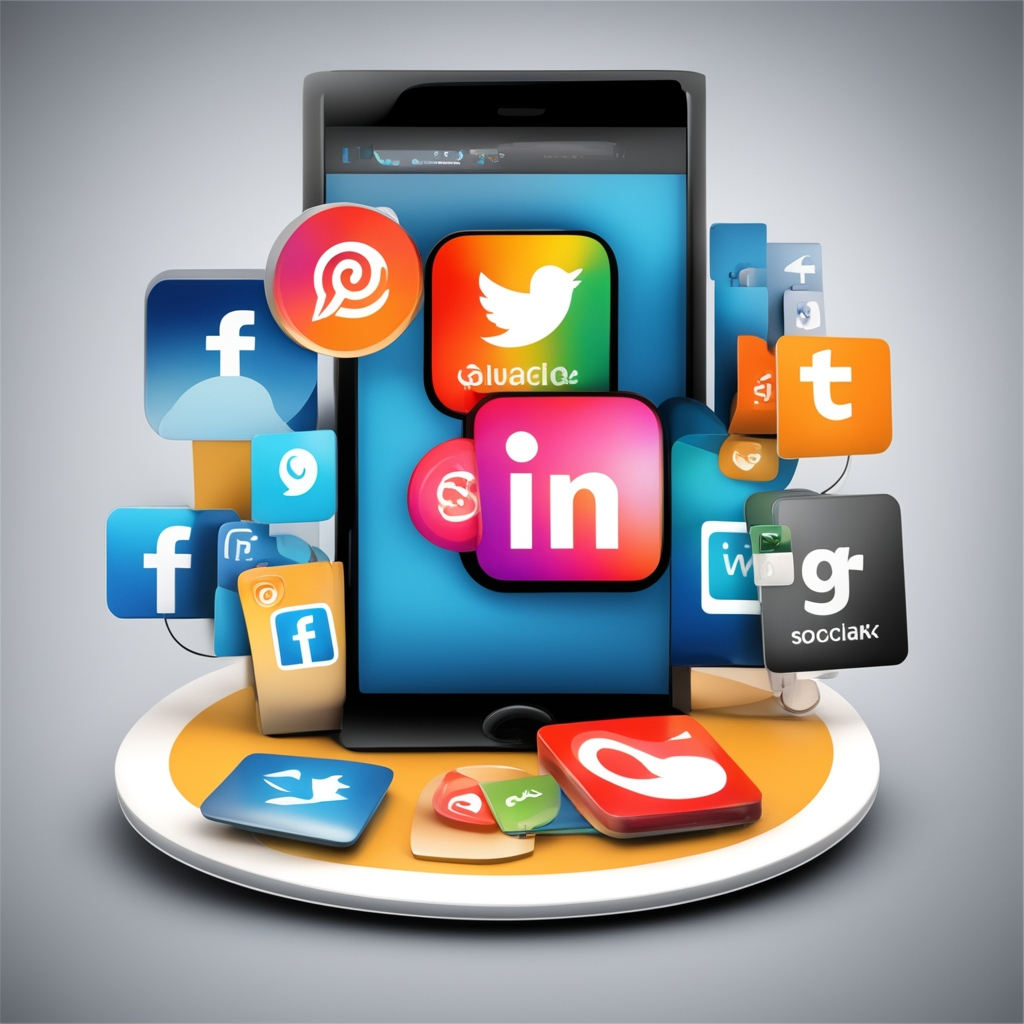

## 2. Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 3. Loading and Exploring the Dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/social.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0



## 4. Data Preprocessing and Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


<Axes: >

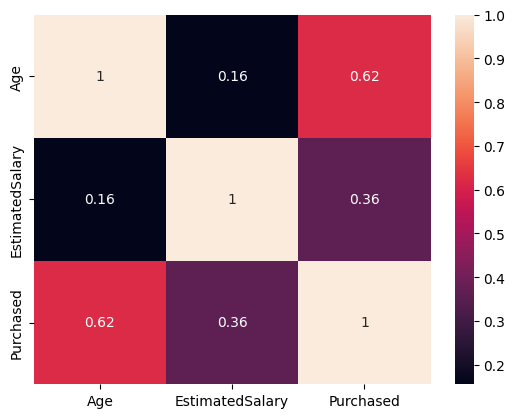

In [18]:
sns.heatmap(df.corr(), annot=True)

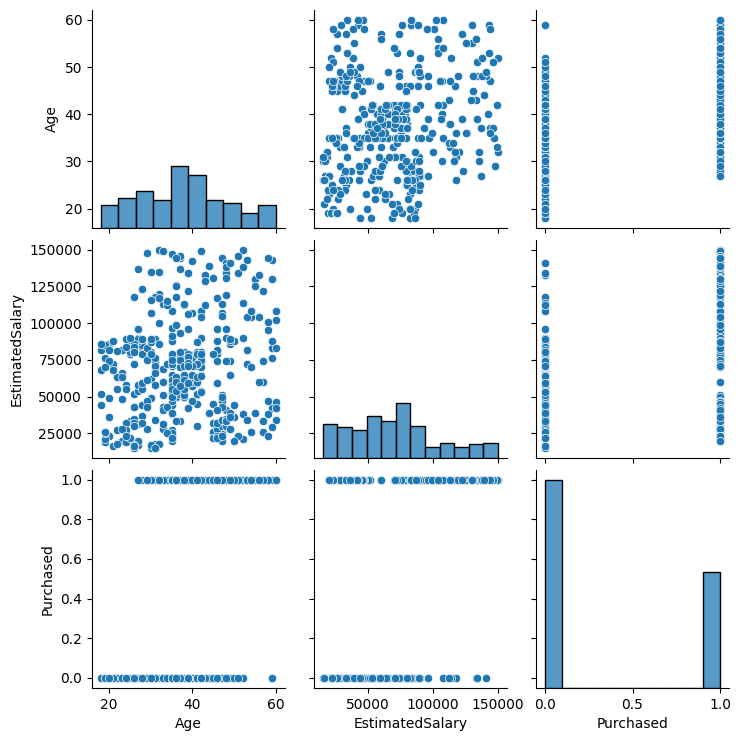

In [53]:
sns.pairplot(df)

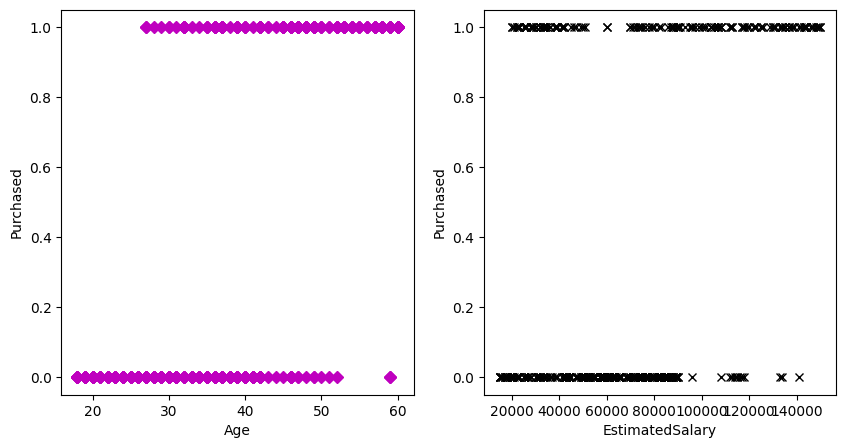

In [52]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(121)
ax.plot(df['Age'], df['Purchased'], 'mD')
ax.set_xlabel('Age')
ax.set_ylabel('Purchased')

bx=fig.add_subplot(122)
bx.plot(df['EstimatedSalary'], df['Purchased'],'kx')
bx.set_xlabel('EstimatedSalary')
bx.set_ylabel('Purchased');

<Axes: ylabel='count'>

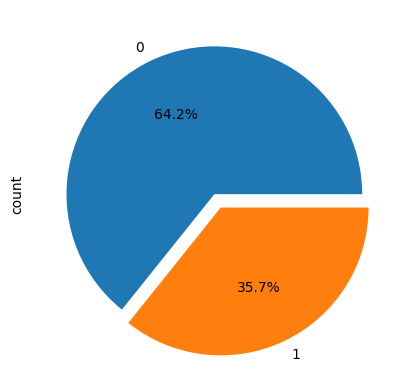

In [78]:
df['Purchased'].value_counts().plot(kind='pie', autopct='%1.1f%%',explode=(0,0.1))

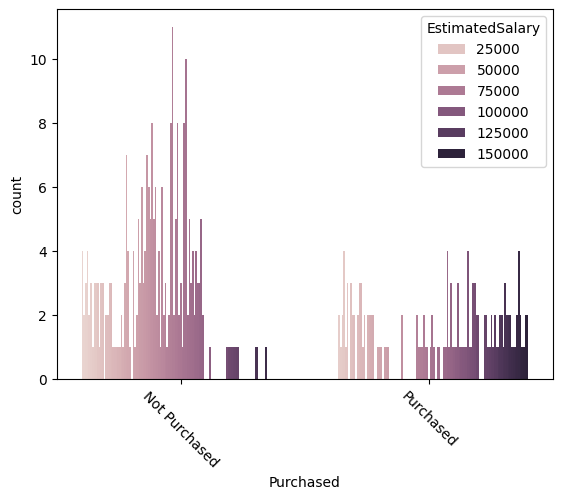

In [92]:
sns.countplot(x='Purchased', hue='EstimatedSalary', data=df)
plt.xticks([0,1], ['Not Purchased', 'Purchased'], rotation=-45);

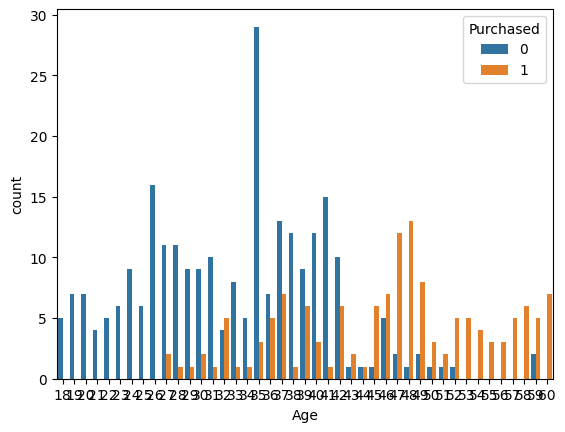

In [87]:
sns.countplot(x='Age', hue='Purchased', data=df,);

## 5. Model Selection and Training

In [91]:
%%time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")

save_model = pickle.dump(model, open('social_media_ads_model.pkl', 'wb'))


Accuracy: 0.90
Confusion Matrix:
[[46  6]
 [ 2 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.81      0.93      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80

CPU times: total: 859 ms
Wall time: 2.11 s


* This model demonstrates a highly effective performance in predicting product purchase behavior from social media ads.

* With an overall accuracy of 90%, it shows reliable prediction capabilities.

* The model is particularly strong in identifying potential customers (high recall for purchases), which could be valuable for marketing strategies.

* It performs slightly better at predicting non-purchases.

* Overall, we can say it's a well-balanced model that effectively forecasts purchase probability using age and estimated salary data, though there's still a small room for improvement in reducing false positives.